<a href="https://colab.research.google.com/github/Shahzodgithub/data_science_practice/blob/main/Simple_LR_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7460,Яшнободский,1,38.0,5,5,24500.0
7461,Яшнободский,2,49.0,1,4,32000.0
7462,Шайхантахурский,2,64.0,3,9,40000.0
7463,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [18]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [19]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [25]:
x = housing['size']
x

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [21]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

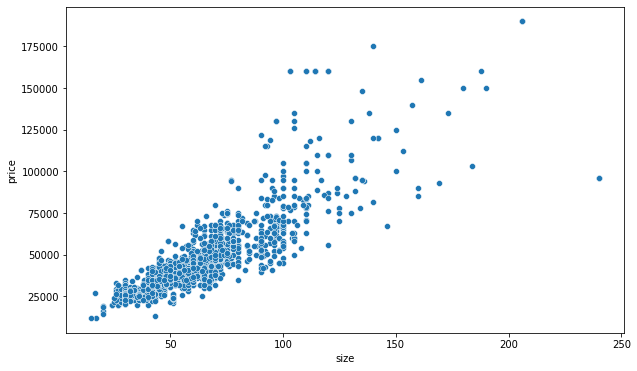

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

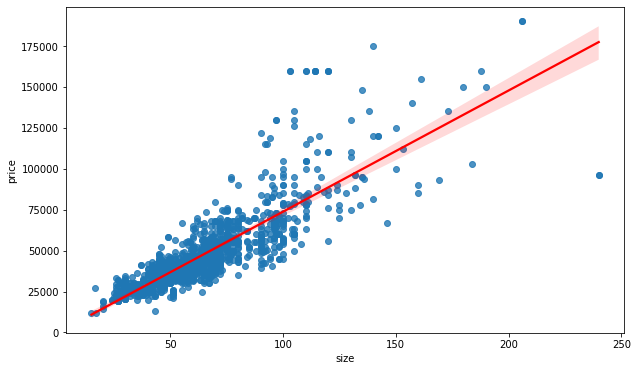

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [33]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
estimate_coef(x,y)

(-195.9491135266726, 740.026482271325)

In [30]:
x_sample = x.sample(500)

In [31]:
x_sample

4154    47.0
802     60.0
7013    50.0
524     51.0
526     51.0
        ... 
888     72.0
6240    46.0
6761    91.0
7134    65.0
3419    42.0
Name: size, Length: 500, dtype: float64

In [32]:
estimate_coef(x_sample,y)[1]

811.6069511901151

In [48]:
d = y - estimate_coef(x_sample,y)[1]
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

In [49]:
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

In [50]:
mae_f

44805.88067257157

In [51]:
rmse_f

50236.97086162796